In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Function to get financial data from Yahoo Finance
def get_financial_data(ticker):
    stock = yf.Ticker(ticker)
    # Get financials
    financials = stock.financials
    # Get yearly revenue
    revenue = financials.loc['Total Revenue']
    # Get net profit
    net_profit = financials.loc['Net Income']
    return revenue, net_profit

# Function to scrape countries of operation from Wikipedia
def get_countries_of_operation():
    url = "https://en.wikipedia.org/wiki/NIO_(car_company)"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the section with operational details
    for header in soup.find_all(['h2', 'h3']):
        if 'Operations' in header.text or 'Markets' in header.text:
            countries = header.find_next('ul').text
            return countries

# Get financial data for NIO Inc.
ticker = "NIO"
revenue, net_profit = get_financial_data(ticker)

# Display number of sales for the last 2 years
print("Revenue for the last 2 years:")
print(revenue.head(2)) # Assuming revenue is in descending order of years

# Display net profit for the last 2 years
print("\nNet Profit for the last 2 years:")
print(net_profit.head(2)) # Assuming net profit is in descending order of years




Revenue for the last 2 years:
2023-12-31    55617933000.0
2022-12-31    49268561000.0
Name: Total Revenue, dtype: object

Net Profit for the last 2 years:
2023-12-31   -21146967000.0
2022-12-31   -14559445000.0
Name: Net Income, dtype: object

Countries of Operation:
None


In [2]:
import matplotlib.pyplot as plt

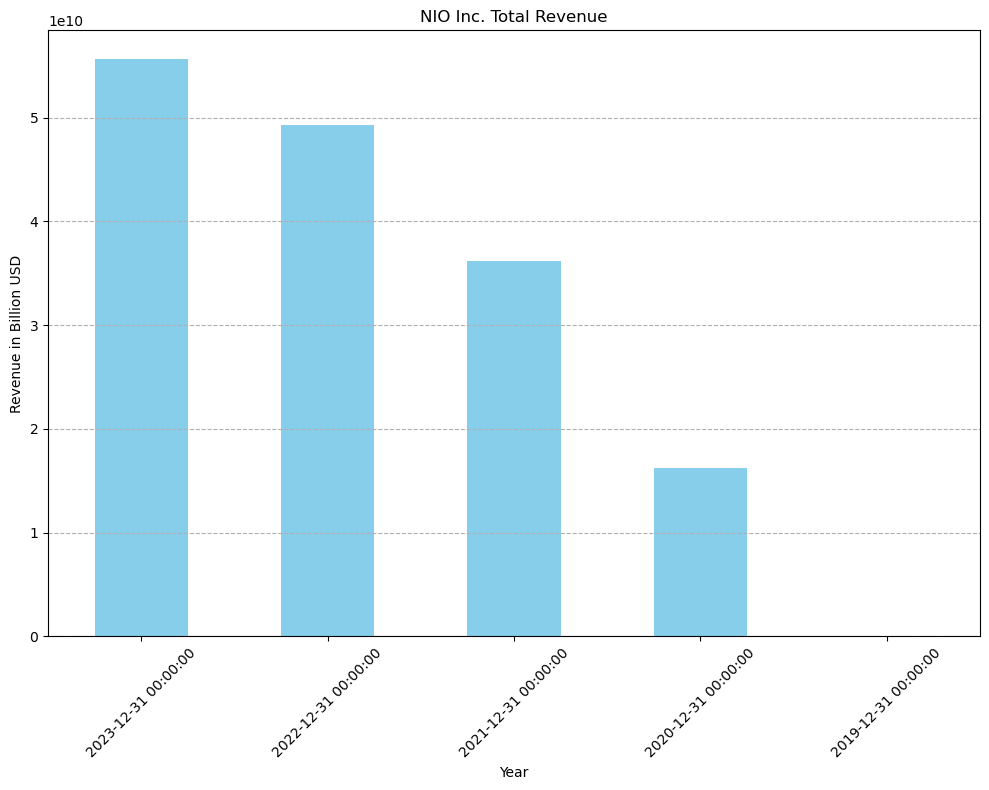

In [5]:
plt.figure(figsize=(10, 8))
revenue.plot(kind='bar', color='skyblue')
plt.title('NIO Inc. Total Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue in Billion USD')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()